# Objective
*  Overfitting to be dealt properly
*  Dropouts introduced
*  Removal of Bias
*  Batch Size increased

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing all the necessary libraries and the MNSIT dataset from Keras.

* MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Printing the shape of the input data and Displaying the First image using MATPLOTLIB



(60000, 28, 28)


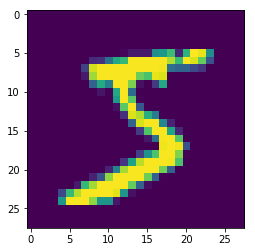

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping of the images in the dataset**

The dataset consists images of dimension 28x28 which is hard to accomodate in a multilayer neural network thus we convert the images using ***reshape()*** funtion

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

First 10 actual output from the training data set



In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding is performed**

Converting the output into one hot encoded vectors for both Train dataset and Test dataset

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Printing the output of the first 10 data after One Hot Encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()

 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), use_bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu', use_bias=False)) # 24
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', use_bias=False)) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D()) # 11
model.add(Conv2D(64, (1, 1), activation='relu', use_bias=False)) # 11
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', use_bias=False)) # 9
model.add(Conv2D(128, (3, 3), activation='relu', use_bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(10, 1, activation='relu', use_bias=False)) #7
model.add(BatchNormalization())
model.add(Conv2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73728     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 128)       512       
__________


Compiling the model based on following:

1. Optimization method: We are using 'SGD' optimization method here.

2. For loss function we are using: binary crossentropy

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Start training the model:

1. Batch size: set to 64
2. Epochs: set to 10

In [13]:
model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1671 - acc: 0.9420
Epoch 2/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0629 - acc: 0.9793
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0428 - acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0334 - acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0276 - acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0239 - acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0214 - acc: 0.9930
Epoch 8/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0191 - acc: 0.9937
Epoch 9/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0177 - acc: 0.9942
Epoch 10/10
60000/60000 [=========

Evaluating the model performance



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing the model performance Score



In [15]:
print(score)

[0.016489452786371112, 0.9947499990463257]


# Observation


*   Introduction of Dropouts helped in dealing with overfitting
*   Removal of Bias brought about minimal decrease in parameter count
*   Increased batch size helped in making the network runtime efficient



In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.84812335e-06 2.45561137e-06 2.83706031e-05 3.41021732e-05
  4.45624657e-08 1.67408166e-06 9.03766129e-09 9.99657273e-01
  4.44716335e-07 2.70796183e-04]
 [1.20841805e-02 1.52398288e-01 8.17539990e-01 6.42247638e-03
  5.99190316e-05 3.35661230e-06 1.13166953e-02 4.90987477e-05
  1.18877419e-04 7.14701810e-06]
 [1.96639558e-05 9.99189794e-01 9.59453464e-05 7.29864632e-06
  2.59205932e-04 1.83499412e-06 2.10245616e-05 3.67372326e-04
  1.23254495e-05 2.56077492e-05]
 [9.99444783e-01 7.25055224e-06 5.66982044e-06 1.13138403e-05
  4.31455046e-05 1.33008025e-05 3.16548743e-04 2.94160582e-05
  3.94173321e-06 1.24503116e-04]
 [5.22486080e-05 3.27521775e-05 1.69266923e-06 1.74554611e-06
  9.98085737e-01 7.50213667e-06 2.71006393e-05 1.98974321e-05
  5.99017255e-07 1.77073234e-03]
 [7.51238576e-06 9.99548376e-01 1.65792098e-05 1.43215800e-06
  1.62502372e-04 5.03432375e-07 6.10537154e-06 2.41927715e-04
  4.90378306e-06 1.01390560e-05]
 [4.21449886e-06 1.74611527e-03 5.59019609e-05 3.04676050e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


KeyError: ignored